In [3]:
# Pandas y numpy para manipulación
import pandas as pd
import numpy as np
import glob as glob
import seaborn as sn
import os as os
from datetime import datetime
# Librerias para gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
# Herramientas de modelado
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
pd.options.mode.chained_assignment = 'warn'  # default='warn'

La ida principal radica en que casi todos los  años en argentina  en alguna ciudad  o pueblo de ciudad, hay apagones de luz, si bien el dataset es sacado de paises bajos es a razon que no encontramos dataset de consumo de kw-h

**Sobre este directorio**<br>

Cada archivo es de un administrador de red de un año específico.

Las columnas de cada archivo son:<br>

**● net_manager:**      código del administrador de la red regional<br>
**● purchase_area:**    código del área donde se compra la energía<br>
**● street:**           Nombre de la calle<br>
**● zipcode_fromy zipcode_to:** 2 columnas para el rango de códigos postales cubiertos, 4 números y 2 letras<br>
**● city:**             Nombre de la ciudad<br>
**● num_connections:**  Número de conexiones en el rango de códigos postales<br>
**● delivery_perc:**    porcentaje del consumo neto de electricidad o gas. Cuanto más bajo, más energía se devolvió a la red (por ejemplo, si tiene paneles solares)<br>
**● perc_of_active_connections:**   Porcentaje de conexiones activas en el rango de código postal<br>
**● type_of_connection:**           principal tipo de conexión en el rango de código postal. Para la electricidad son # fusibles X # amperios. Para gas es G4, G6, G10, G16, G25<br>
**● type_conn_perc:**   porcentaje de presencia del tipo principal de conexión en el rango del código postal<br>
**● annual_consume:**   Consumo anual. Kwh para electricidad, m3 para gas<br>
**● annual_consume_lowtarif_perc:** Porcentaje de consumo en horario de tarifa baja. De 22:00 a 07:00 y los fines de semana.<br>
**● smartmeter_perc:**  porcentaje de smartmeters en los rangos de código postal<br>

In [96]:
def load_and_reindex(path,filelist):
    start_time = datetime.now()
    df = None
    for file in filelist:
        year = file[-8:-4]
        manager = file.split('_')[0]
        if df is None:
            df = pd.read_csv(path+file)
            df['year'] = year
            df.index = manager+'_'+year+'_'+df.index.astype(str)
        else:
            temp = pd.read_csv(path+file)
            temp['year'] = year
            temp.index = manager+'_'+year+'_'+temp.index.astype(str)
            df = df.append(temp)
    time_elapsed = datetime.now() - start_time
    print('Made main dataframe, time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
    return(df)

In [144]:
path = './dataset/Electricity/'
files_all = [f for f in os.listdir(path)]
elec_all = load_and_reindex(path,files_all)

Made main dataframe, time elapsed (hh:mm:ss.ms) 0:01:06.730535


In [128]:
print(files_all)

['coteq_electricity_2013.csv', 'coteq_electricity_2014.csv', 'coteq_electricity_2015.csv', 'coteq_electricity_2016.csv', 'coteq_electricity_2017.csv', 'coteq_electricity_2018.csv', 'coteq_electricity_2019.csv', 'coteq_electricity_2020.csv', 'enduriselectricity_01012013.csv', 'enduriselectricity_01012014.csv', 'enduriselectricity_01012015.csv', 'enduriselectricity_01012016.csv', 'enduriselectricity_01012017.csv', 'enduriselectricity_01012018.csv', 'enduriselectricity_01012019.csv', 'liander_electricity_01012009.csv', 'liander_electricity_01012010.csv', 'liander_electricity_01012011.csv', 'liander_electricity_01012012.csv', 'liander_electricity_01012013.csv', 'liander_electricity_01012014.csv', 'liander_electricity_01012015.csv', 'liander_electricity_01012016.csv', 'liander_electricity_01012017.csv', 'liander_electricity_01012018.csv', 'liander_electricity_01012019.csv', 'liander_electricity_01012020.csv', 'rendo_electricity_2011.csv', 'rendo_electricity_2012.csv', 'rendo_electricity_201

In [129]:
elec_all.shape


(2779991, 18)

In [130]:
# Evaluamos el porcentaje de datos nulos por columna
def describe_data(cols: list, data: pd.DataFrame) -> pd.DataFrame:
    
    diccionario = {
        'Null': data.shape[0] - data.count(), 
        '% Null': round((data.shape[0] - data.count()) / data.shape[0] * 100, 3),
        'Types': data.dtypes
    }    
    return pd.DataFrame(index=cols, data=diccionario)


In [131]:
describe_data(elec_all.columns,elec_all)

,Null,% Null,Types
net_manager,29224,1.051,object
purchase_area,886657,31.894,object
street,0,0.000,object
zipcode_from,0,0.000,object
zipcode_to,0,0.000,object
city,0,0.000,object
num_connections,7,0.000,float64
delivery_perc,1487,0.053,float64
perc_of_active_connections,1487,0.053,float64
type_conn_perc,7,0.000,object


In [132]:
elec_all.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,ï»¿NETBEHEERDER,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
coteq_2013_0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89,1x35,4122.0,89.47,0.0,2013,NaN,NaN,NaN


In [148]:
columnas_nueva=["cod_red_regional","cod_area_buy_energia","calle","cod_postal_desde","cod_postal_hasta","ciudad","nums_de_conexiones","perc_consumo_neto","perc_conxn_activa","perc_tipo_de_conxn","tipo_conx","consumo_anual","perc_cons_lowtarif","perc_smartmeter","year","ï»¿NETBEHEERDER","STANDAARDDEVIATIE","%Defintieve aansl (NRM)"]

elec_all_prueba.columns=columnas_nueva

In [152]:
data_desc = pd.DataFrame(round(elec_all_prueba.isnull().sum() /elec_all_prueba.shape[0],2), columns= ['Porcentaje de nulos'])
data_desc['type'] = elec_all_prueba.dtypes
data_desc = data_desc[['type','Porcentaje de nulos']]
data_desc['Nulos'] = elec_all_prueba.isnull().sum()
values= []
example=[]
for x in elec_all_prueba:
    values.append(len(elec_all_prueba[x].unique()))
    example.append(elec_all_prueba[x].unique())
data_desc['Valores distintos'] = values
data_desc['Ejemplos'] = example

data_desc

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
cod_red_regional,object,0.01,29224,17,"[Coteq Netbeheer BV, Cogas Infra & Beheer BV, ..."
cod_area_buy_energia,object,0.32,886657,15,"[Netbeheerder Centraal Overijssel B.V., Enduri..."
calle,object,0.00,0,76459,"[Dorpsstraat, De Stoevelaar, Kerkstraat, Stati..."
cod_postal_desde,object,0.00,0,251927,"[7468CP, 7471AB, 7471AC, 7471AD, 7471AG, 7471A..."
cod_postal_hasta,object,0.00,0,249440,"[7471AA, 7471AB, 7471AC, 7471AE, 7471AG, 7471A..."
ciudad,object,0.00,0,1588,"[ENTER, GOOR, OLDENZAAL, ALMELO, ZIERIKZEE, OU..."
nums_de_conexiones,float64,0.00,7,526,"[19.0, 37.0, 16.0, 25.0, 14.0, 11.0, 20.0, 12...."
perc_consumo_neto,float64,0.00,1487,2617,"[89.47, 100.0, 92.0, 85.71, 84.21, 90.91, 95.0..."
perc_conxn_activa,float64,0.00,1487,3534,"[94.74, 100.0, 84.0, 85.0, 94.12, 88.89, 97.06..."
perc_tipo_de_conxn,object,0.00,7,3615,"[89, 86, 100, 44, 36, 53, 64, 35, 67, 47, 93, ..."


In [153]:
#antes de continuar eliminaremos los datos no representan relevancia como ser "cod_red_regional","ï»¿NETBEHEERDER", STANDAARDDEVIATIE y "%Defintieve aansl (NRM)"
elec_all_prueba.drop(['ï»¿NETBEHEERDER', 'STANDAARDDEVIATIE', '%Defintieve aansl (NRM)','cod_red_regional'], axis=1, inplace=True)
elec_all_prueba.columns

Index(['cod_red_regional', 'cod_area_buy_energia', 'calle', 'cod_postal_desde',
       'cod_postal_hasta', 'ciudad', 'nums_de_conexiones', 'perc_consumo_neto',
       'perc_conxn_activa', 'perc_tipo_de_conxn', 'tipo_conx', 'consumo_anual',
       'perc_cons_lowtarif', 'perc_smartmeter', 'year'],
      dtype='object')

In [154]:
#dataset de practica
elec_all_2=elec_all_prueba

In [173]:
describe_data(elec_all_2.columns,elec_all_2)

,Null,% Null,Types
cod_red_regional,29224,1.051,object
cod_area_buy_energia,886657,31.894,object
calle,0,0.000,object
cod_postal_desde,0,0.000,object
cod_postal_hasta,0,0.000,object
ciudad,0,0.000,object
nums_de_conexiones,7,0.000,float64
perc_consumo_neto,1487,0.053,float64
perc_conxn_activa,1487,0.053,float64
perc_tipo_de_conxn,7,0.000,object


In [155]:
new_df=elec_all_2.assign(net_manager=elec_all_2.index)

new_df.head(1)

,cod_red_regional,cod_area_buy_energia,calle,cod_postal_desde,cod_postal_hasta,ciudad,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,tipo_conx,consumo_anual,perc_cons_lowtarif,perc_smartmeter,year,net_manager
coteq_2013_0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89,1x35,4122.0,89.47,0.0,2013,coteq_2013_0


In [156]:
new_df.reset_index(inplace=True)


In [157]:
new_df.head(1)

,index,cod_red_regional,cod_area_buy_energia,calle,cod_postal_desde,cod_postal_hasta,ciudad,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,tipo_conx,consumo_anual,perc_cons_lowtarif,perc_smartmeter,year,net_manager
0,coteq_2013_0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89,1x35,4122.0,89.47,0.0,2013,coteq_2013_0


In [158]:
new_df.drop(['index',], axis=1, inplace=True)


In [159]:
new_df.sample(5)

,cod_red_regional,cod_area_buy_energia,calle,cod_postal_desde,cod_postal_hasta,ciudad,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,tipo_conx,consumo_anual,perc_cons_lowtarif,perc_smartmeter,year,net_manager
1484717,Liander NB,LIANDER,Regenboogweg,1339GW,1339GW,ALMERE,18.0,83.33,100.00,100,1x35,3738.0,94.44,100.00,2019,liander_2019_28787
885962,Liander N.V.,NaN,Jan Jurjenssingel,8564HB,8564HB,RUIGAHUIZEN,15.0,86.67,93.33,60,3x25,3495.0,40.00,6.67,2014,liander_2014_126395
2458000,8716892000005,Stedin,Voornsevliet,3082KZ,3082KZ,ROTTERDAM,22.0,100.00,100.00,82,1x35,5245.0,68.18,45.45,2017,stedin_2017_39778
1179457,Liander N.V. (NW),NaN,Hillegomstraat,1058LP,1058LP,AMSTERDAM,34.0,100.00,100.00,71,1x25,2135.0,44.12,44.12,2017,liander_2017_7276
1377350,Liander N.V. (NW),NaN,Jonkheer van de Pollstr,2151AD,2151AD,NIEUW-VENNEP,14.0,100.00,35.71,71,1x25,2768.0,35.71,14.29,2018,liander_2018_63685


In [171]:
new_df_2=new_df
new_df_2['perc_tipo_de_conxn'] = new_df['perc_tipo_de_conxn'].str.replace(',','.')

In [166]:
#sacar los nan de  la columna type_conn_perc
data_sin_nan = new_df_2[new_df_2['perc_tipo_de_conxn'].notna()]


In [167]:
data_sin_nan.head()

,cod_red_regional,cod_area_buy_energia,calle,cod_postal_desde,cod_postal_hasta,ciudad,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,tipo_conx,consumo_anual,perc_cons_lowtarif,perc_smartmeter,year,net_manager
20156,8716902000001,Enduris Netgebied,Poststraat,4301AA,4301AA,ZIERIKZEE,14.0,100.0,100.0,85.71,3x25,9442.0,78.57,0.00,2013,enduriselectricity_2013_0
20157,8716902000001,Enduris Netgebied,Poststraat,4301AB,4301AD,ZIERIKZEE,34.0,100.0,100.0,64.71,3x25,9284.0,41.18,0.00,2013,enduriselectricity_2013_1
20158,8716902000001,Enduris Netgebied,Korte St. Janstraat,4301AE,4301AE,ZIERIKZEE,17.0,100.0,100.0,82.35,3x25,3086.0,41.18,0.00,2013,enduriselectricity_2013_2
20159,8716902000001,Enduris Netgebied,Fonteine,4301AG,4301AH,ZIERIKZEE,31.0,100.0,100.0,64.52,1x35,3242.0,32.26,6.45,2013,enduriselectricity_2013_3
20160,8716902000001,Enduris Netgebied,Lange St. Janstraat,4301AJ,4301AJ,ZIERIKZEE,17.0,100.0,100.0,64.71,1x35,1735.0,23.53,0.00,2013,enduriselectricity_2013_4


In [168]:
data_sin_nan['perc_tipo_de_conxn'].sample(20)

53664     69.23
57700    100.00
40840    100.00
56364     61.90
83838     73.68
68290     92.31
52896     69.23
44386     52.63
75651     62.86
40148     58.33
46697     56.52
20966     85.71
44771    100.00
57608     80.00
33888     80.00
60880     70.00
59842     71.43
25175     70.00
78764     75.00
45944     91.67
Name: perc_tipo_de_conxn, dtype: object

In [169]:
columnas=['year', 'perc_tipo_de_conxn']
data_sin_nan[columnas] = data_sin_nan[columnas].astype(np.float)

In [170]:
describe_data(data_sin_nan.columns,data_sin_nan)

,Null,% Null,Types
cod_red_regional,29224,43.224,object
cod_area_buy_energia,0,0.000,object
calle,0,0.000,object
cod_postal_desde,0,0.000,object
cod_postal_hasta,0,0.000,object
ciudad,0,0.000,object
nums_de_conexiones,0,0.000,float64
perc_consumo_neto,0,0.000,float64
perc_conxn_activa,0,0.000,float64
perc_tipo_de_conxn,0,0.000,float64


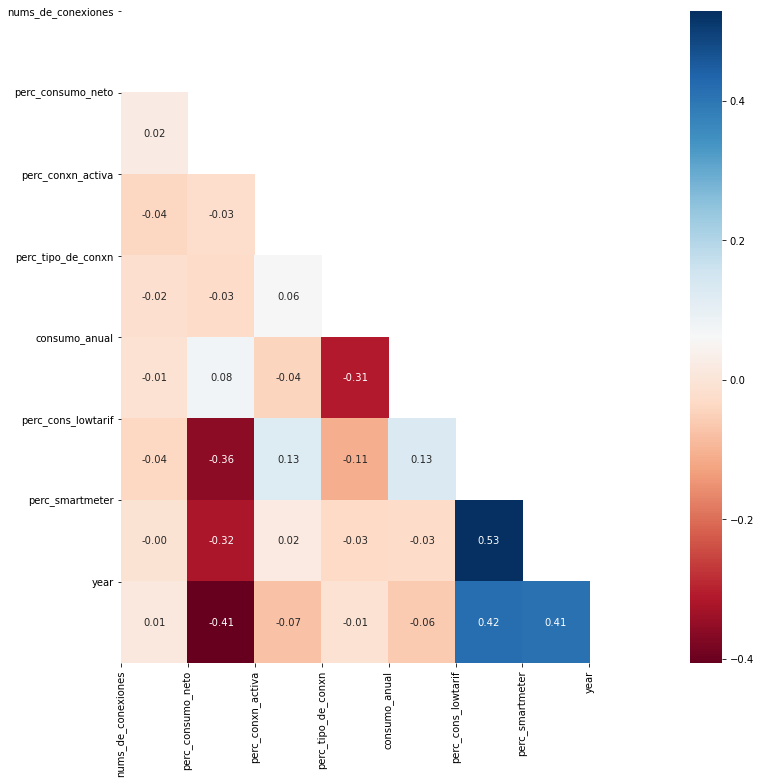

In [174]:
#calculamos el coeficiente de correlacion 
correlacion=  data_sin_nan.corr(method='pearson')

#Sacamos la mitad que se repite
mask=np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax= plt.subplots(figsize=(12,12))
#Generamos el heatmap
sns.heatmap(correlacion,annot=True, fmt='.2f', mask=mask,cmap='RdBu')
#x
plt.xticks(range(len(correlacion.columns)),correlacion.columns)
#y
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
#plot
plt.show()

In [175]:
#probamos  con otro dataset
data_sin_nan_prueba=data_sin_nan


In [176]:
pd.options.mode.chained_assignment =None  # default='warn'

In [177]:
describe_data(data_sin_nan.columns,data_sin_nan)

,Null,% Null,Types
cod_red_regional,29224,43.224,object
cod_area_buy_energia,0,0.000,object
calle,0,0.000,object
cod_postal_desde,0,0.000,object
cod_postal_hasta,0,0.000,object
ciudad,0,0.000,object
nums_de_conexiones,0,0.000,float64
perc_consumo_neto,0,0.000,float64
perc_conxn_activa,0,0.000,float64
perc_tipo_de_conxn,0,0.000,float64


Tratamos de agregar mas variables

In [178]:
#consumo bajo de tarifa
data_sin_nan_prueba['consumo_bajo_anual'] = data_sin_nan_prueba['consumo_anual'].multiply(data_sin_nan_prueba['perc_cons_lowtarif']/100)

In [179]:
print(data_sin_nan_prueba['consumo_bajo_anual'].head(2))
print(data_sin_nan_prueba['perc_cons_lowtarif'].head(2))
print(data_sin_nan_prueba['consumo_anual'].head(2))

20156    7418.5794
20157    3823.1512
Name: consumo_bajo_anual, dtype: float64
20156    78.57
20157    41.18
Name: perc_cons_lowtarif, dtype: float64
20156    9442.0
20157    9284.0
Name: consumo_anual, dtype: float64


In [180]:
data_sin_nan_prueba['conexiones_activas'] = data_sin_nan_prueba['nums_de_conexiones'].multiply(data_sin_nan_prueba['perc_conxn_activa']/100).astype(int)

In [181]:
data_sin_nan_prueba['consumo_neto_anual'] = data_sin_nan_prueba['consumo_anual'].multiply(data_sin_nan_prueba['perc_consumo_neto']/100)
data_sin_nan_prueba['produccion_propia'] = data_sin_nan_prueba['consumo_anual'] - data_sin_nan_prueba['consumo_neto_anual']
data_sin_nan_prueba['%_produccion_propia'] = data_sin_nan_prueba['produccion_propia'].divide(data_sin_nan_prueba['consumo_anual']/100)

In [182]:
data_sin_nan_prueba['cantidad_smartmeter'] = data_sin_nan_prueba['nums_de_conexiones'].multiply(data_sin_nan_prueba['perc_smartmeter']/100).astype(int)

In [183]:
data_sin_nan_prueba.sample(5)

,cod_red_regional,cod_area_buy_energia,calle,cod_postal_desde,cod_postal_hasta,ciudad,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,...,perc_cons_lowtarif,perc_smartmeter,year,net_manager,consumo_bajo_anual,conexiones_activas,consumo_neto_anual,produccion_propia,%_produccion_propia,cantidad_smartmeter
70053,NaN,Enduris Netgebied,Buitenruststraat,4337EM,4337EM,MIDDELBURG,25.0,100.00,100.00,100.00,...,96.00,0.00,2018.0,enduriselectricity_2018_1812,2512.3200,25,2617.000,0.000,0.00,0
63056,NaN,Enduris Netgebied,Kasteelstraat,4421EJ,4421EJ,KAPELLE,19.0,100.00,100.00,100.00,...,94.74,94.74,2017.0,enduriselectricity_2017_4514,3334.8480,19,3520.000,0.000,0.00,18
23850,8716902000001,Enduris Netgebied,Vlissingsestraat,4388HB,4388HB,OOST-SOUBURG,11.0,100.00,100.00,63.64,...,36.36,9.09,2013.0,enduriselectricity_2013_3694,2455.3908,11,6753.000,0.000,0.00,0
21784,8716902000001,Enduris Netgebied,Johan de Brunestraat,4336DH,4336DH,MIDDELBURG,16.0,100.00,100.00,81.25,...,50.00,6.25,2013.0,enduriselectricity_2013_1628,1290.0000,16,2580.000,0.000,0.00,1
48145,8716902000001,Enduris Netgebied,Tragel,4576ER,4576EZ,KOEWACHT,23.0,95.65,95.65,52.17,...,69.57,4.35,2015.0,enduriselectricity_2015_8858,1893.6954,21,2603.593,118.407,4.35,1


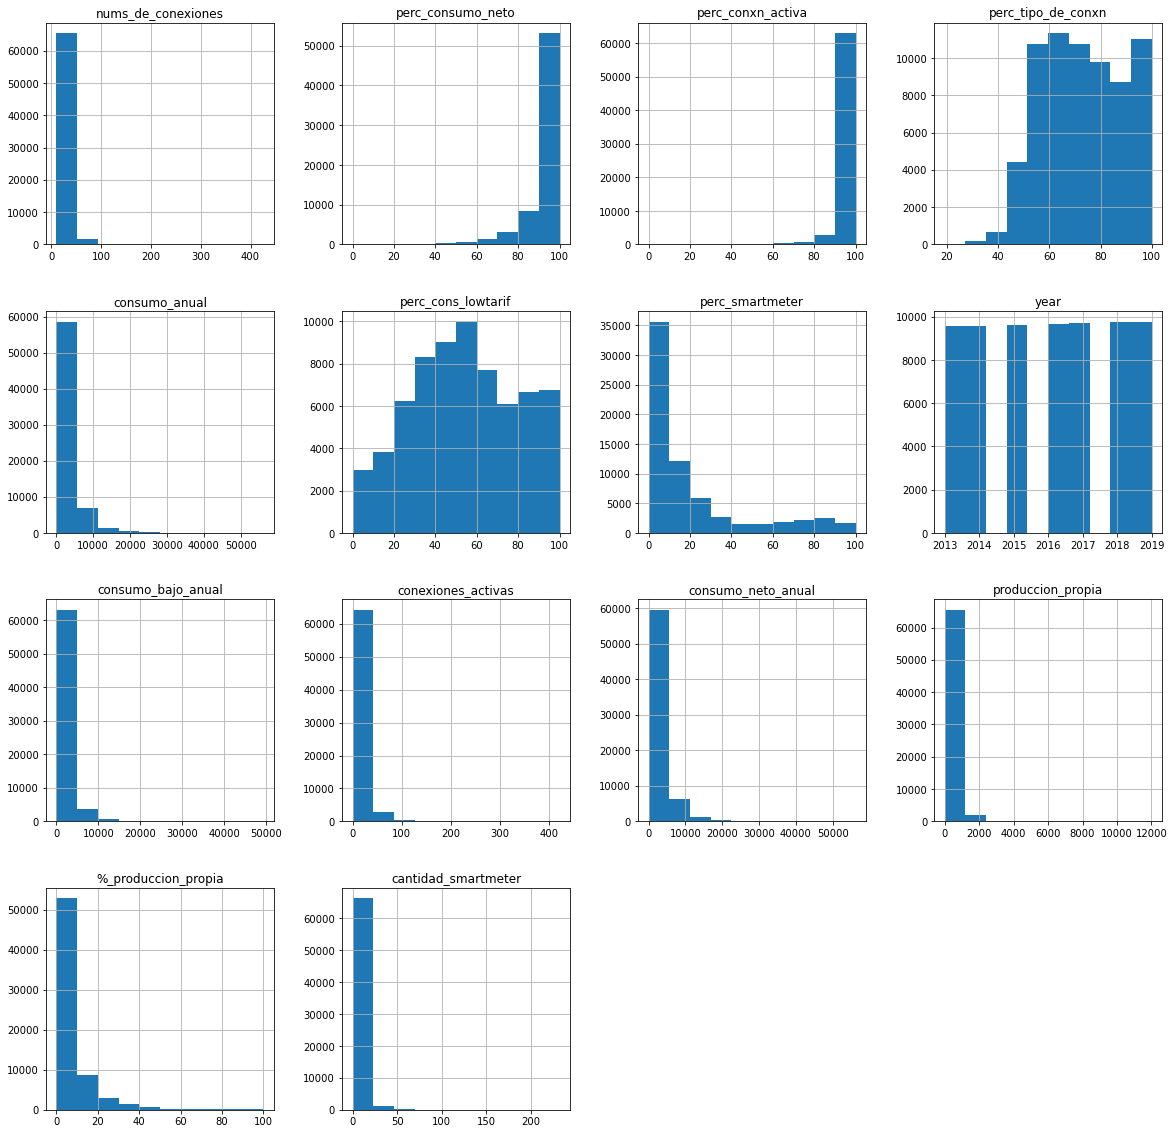

In [184]:
data_sin_nan_prueba.hist(figsize=(20,20))
plt.show()

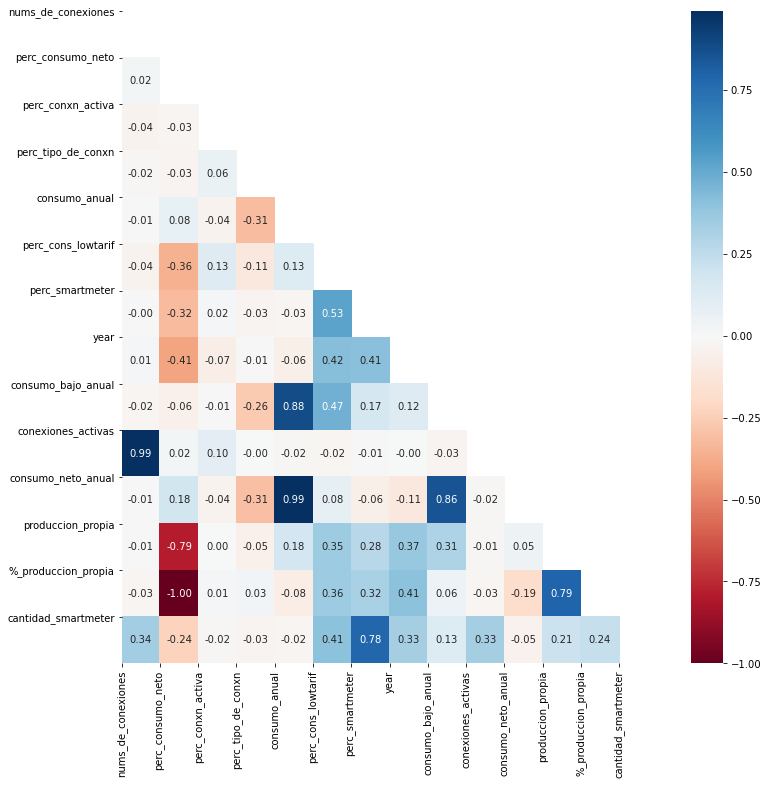

In [185]:
#calculamos el coeficiente de correlacion 
correlacion=  data_sin_nan_prueba.corr(method='pearson')

#Sacamos la mitad que se repite
mask=np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f, ax= plt.subplots(figsize=(12,12))
#Generamos el heatmap
sns.heatmap(correlacion,annot=True, fmt='.2f', mask=mask,cmap='RdBu')
#x
plt.xticks(range(len(correlacion.columns)),correlacion.columns)
#y
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
#plot
plt.show()

In [186]:
data_sin_nan_prueba.shape

(67610, 22)

In [189]:
data_sin_nan_prueba.describe()

,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,consumo_anual,perc_cons_lowtarif,perc_smartmeter,year,consumo_bajo_anual,conexiones_activas,consumo_neto_anual,produccion_propia,%_produccion_propia,cantidad_smartmeter
count,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67610.000000,67445.000000,67610.000000
mean,22.346532,93.351676,97.161094,73.193897,3889.944490,53.298873,19.162665,2016.016166,2175.370712,21.573303,3659.980100,229.964390,6.663290,3.989854
std,14.486146,11.803185,8.765497,15.958399,3113.302082,25.497996,25.904935,2.000530,2229.799724,14.091611,3067.141670,410.757627,11.812529,7.215604
min,10.000000,0.000000,0.000000,19.050000,0.000000,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,90.910000,97.560000,60.000000,2433.000000,34.780000,0.000000,2014.000000,973.144075,14.000000,2242.105425,0.000000,0.000000,0.000000
50%,19.000000,100.000000,100.000000,72.730000,3067.000000,52.170000,8.700000,2016.000000,1700.307200,19.000000,2877.331350,0.000000,0.000000,1.000000
75%,25.000000,100.000000,100.000000,86.360000,4067.000000,73.570000,23.530000,2018.000000,2640.014550,24.000000,3864.195000,317.984800,9.090000,5.000000
max,426.000000,100.000000,100.000000,100.000000,56202.000000,100.000000,100.000000,2019.000000,49325.000000,421.000000,56202.000000,12017.200000,100.000000,232.000000


In [211]:
dataframe_limpio_group_b_typ_conex.tipo_conx.value_counts()

tipo_conx  tipo_conx
1x35       1x35         34713
1x6        1x6             11
3x25       3x25         32676
3x35       3x35           148
3x50       3x50             8
3x63       3x63            17
3x80       3x80            37
Name: tipo_conx, dtype: int64

In [234]:
dataframe_limpio_group_b_typ_conex = data_sin_nan_prueba.groupby("tipo_conx").size().reset_index(name="Total")
print(len(dataframe_limpio_group_b_typ_conex))
print(dataframe_limpio_group_b_typ_conex)


7
  tipo_conx  Total
0      1x35  34713
1       1x6     11
2      3x25  32676
3      3x35    148
4      3x50      8
5      3x63     17
6      3x80     37


In [199]:
elec_all_prueba.drop(['cod_red_regional'], axis=1, inplace=True)


,cod_area_buy_energia,calle,cod_postal_desde,cod_postal_hasta,ciudad,nums_de_conexiones,perc_consumo_neto,perc_conxn_activa,perc_tipo_de_conxn,tipo_conx,consumo_anual,perc_cons_lowtarif,perc_smartmeter,year
coteq_2013_0,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89,1x35,4122.0,89.47,0.00,2013
coteq_2013_1,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37.0,100.00,100.00,86,1x35,1800.0,94.59,0.00,2013
coteq_2013_2,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16.0,100.00,100.00,100,1x35,1315.0,100.00,0.00,2013
coteq_2013_3,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25.0,92.00,84.00,44,1x35,6379.0,92.00,0.00,2013
coteq_2013_4,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14.0,85.71,100.00,36,1x35,4404.0,92.86,0.00,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
westland-infra_2020_2552,871687800090000015,IN DE BALIJE,3155XA,3155XA,MAASLAND,14.0,92.86,100.00,86,3x25,6313.0,100.00,85.71,2020
westland-infra_2020_2553,871687800090000015,KONINGIN JULIANAWEG,3155XB,3155XB,MAASLAND,14.0,92.86,100.00,64,3x25,4966.0,100.00,100.00,2020
westland-infra_2020_2554,871687800090000015,KONINGIN JULIANAWEG,3155XC,3155XD,MAASLAND,29.0,75.86,100.00,69,3x25,7293.0,100.00,82.76,2020
westland-infra_2020_2555,871687800090000015,KONINGIN JULIANAWEG,3155XE,3155XH,MAASLAND,28.0,75.00,100.00,71,3x25,3194.0,96.43,60.71,2020


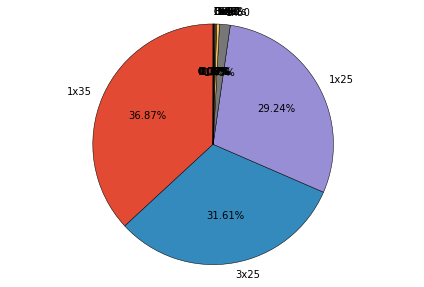

In [233]:
count=elec_all_prueba["tipo_conx"].value_counts().tolist()

label=elec_all_prueba["tipo_conx"].value_counts().index


plt.style.use('ggplot')

dic = dict(zip(label,count))

import itertools
newdic={}
for key, group in itertools.groupby(dic, lambda k: 'Others' if (dic[k]<30) else k):
     newdic[key] = sum([dic[i] for i in list(group)])   

labels = newdic.keys()
sizes = newdic.values()

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.2f%%',wedgeprops={"edgecolor":"k"}, startangle=90)
ax.axis('equal')
plt.tight_layout()

plt.show()